In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Concatenate, Dropout


In [3]:
def process_numbers()
  while True:
    num=int(input())
    if num<0:
      print('neg')
      break
    if num%2 == 0:
      if num%3==0:
        print("div3")
      else:
        print("inside: ", num)
    else:
      print(num)


6
div3
7
7
-7
neg


In [ ]:
df=pd.read_csv("/kaggle/input/finaldata/cleanedDataset.csv")

In [ ]:
df

Thought     Label  word_count  \
0                             everyon probabl mad  negative           3   
1                                   braver believ  positive           2   
2                               open eye want see  positive           4   
3                 clearli dont want friend anymor  negative           5   
4                                never done befor  negative           3   
...                                           ...       ...         ...   
156780                       believ fast time fli  negative           4   
156781                             eat spici food  negative           3   
156782                  itâ OK screw Up nigel raw  positive           6   
156783  itâ here itâ beauti itâ sign fit right in  positive           9   
156784                 stuck â cover alicia widar  negative           5   

        unique_word_count  stop_word_count  url_count  mean_word_length  \
0                       3                0          0          6.333333   
1                       2                0          0          6.500000   
2                       4                0          0          3.750000   
3                       5                0          0          5.800000   
4                       3                1          0          5.000000   
...                   ...              ...        ...               ...   
156780                  4                0          0          5.000000   
156781                  3                0          0          4.000000   
156782                  6                1          0          3.500000   
156783                  7                2          0          4.666667   
156784                  5                0          0          4.400000   

        char_count  punctuation_count  hashtag_count  mention_count  \
0               21                  0              0              0   
1               14                  0              0              0   
2               18                  0              0              0   
3               33                  0              0              0   
4               17                  0              0              0   
...            ...                ...            ...            ...   
156780          23                  0              0              0   
156781          14                  0              0              0   
156782          26                  0              0              0   
156783          50                  0              0              0   
156784          26                  0              0              0   

        length_of_Thought  
0                      21  
1                      14  
2                      18  
3                      33  
4                      17  
...                   ...  
156780                 23  
156781                 14  
156782                 26  
156783                 50  
156784                 26  

[156785 rows x 12 columns]

In [ ]:
df = df[['Thought', 'Label']]

In [ ]:
df

Thought     Label
0                             everyon probabl mad  negative
1                                   braver believ  positive
2                               open eye want see  positive
3                 clearli dont want friend anymor  negative
4                                never done befor  negative
...                                           ...       ...
156780                       believ fast time fli  negative
156781                             eat spici food  negative
156782                  itâ OK screw Up nigel raw  positive
156783  itâ here itâ beauti itâ sign fit right in  positive
156784                 stuck â cover alicia widar  negative

[156785 rows x 2 columns]

In [ ]:
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Thought    79
Label       0
dtype: int64


In [ ]:
# Count total NaN values in the entire DataFrame
total_nan_count = df.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:")
print(total_nan_count)


Total NaN values in the DataFrame:
79


In [ ]:
df = df.dropna()

In [ ]:
# Count total NaN values in the entire DataFrame
total_nan_count = df.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:")
print(total_nan_count)


Total NaN values in the DataFrame:
0


In [ ]:
# X = df['Thought'].values.reshape(-1, 1)  # Features
# y = df['Label']  # Target variable

# # Apply Random Over Sampling
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# df_resampled = pd.DataFrame({'Thought': X_resampled.flatten(), 'Label': y_resampled})

In [ ]:
# df = df_resampled.copy()

In [ ]:
# Encode the labels
df['Thought'] = df['Thought'].astype(str)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Thought'], df['Label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = 600
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

/tmp/ipykernel_34/2299932996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thought'] = df['Thought'].astype(str)
/tmp/ipykernel_34/2299932996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = label_encoder.fit_transform(df['Label'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional, Concatenate, GlobalMaxPooling1D

# Define the input layer
input_layer = Input(shape=(max_len,))

# Embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# CNN part
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)

# BiLSTM part
bilstm_layer = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

# Concatenate CNN and BiLSTM outputs
concat_layer = Concatenate()([pooling_layer, bilstm_layer])

# Add Dense layers
dense_layer = Dense(128, activation='relu')(concat_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 600, 128)  │  4,862,592 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 596, 128)  │     82,048 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256)       │    263,168 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     49,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,257,217 (20.05 MB)

 Trainable params: 5,257,217 (20.05 MB)

 Non-trainable params: 0 (0.00 B)

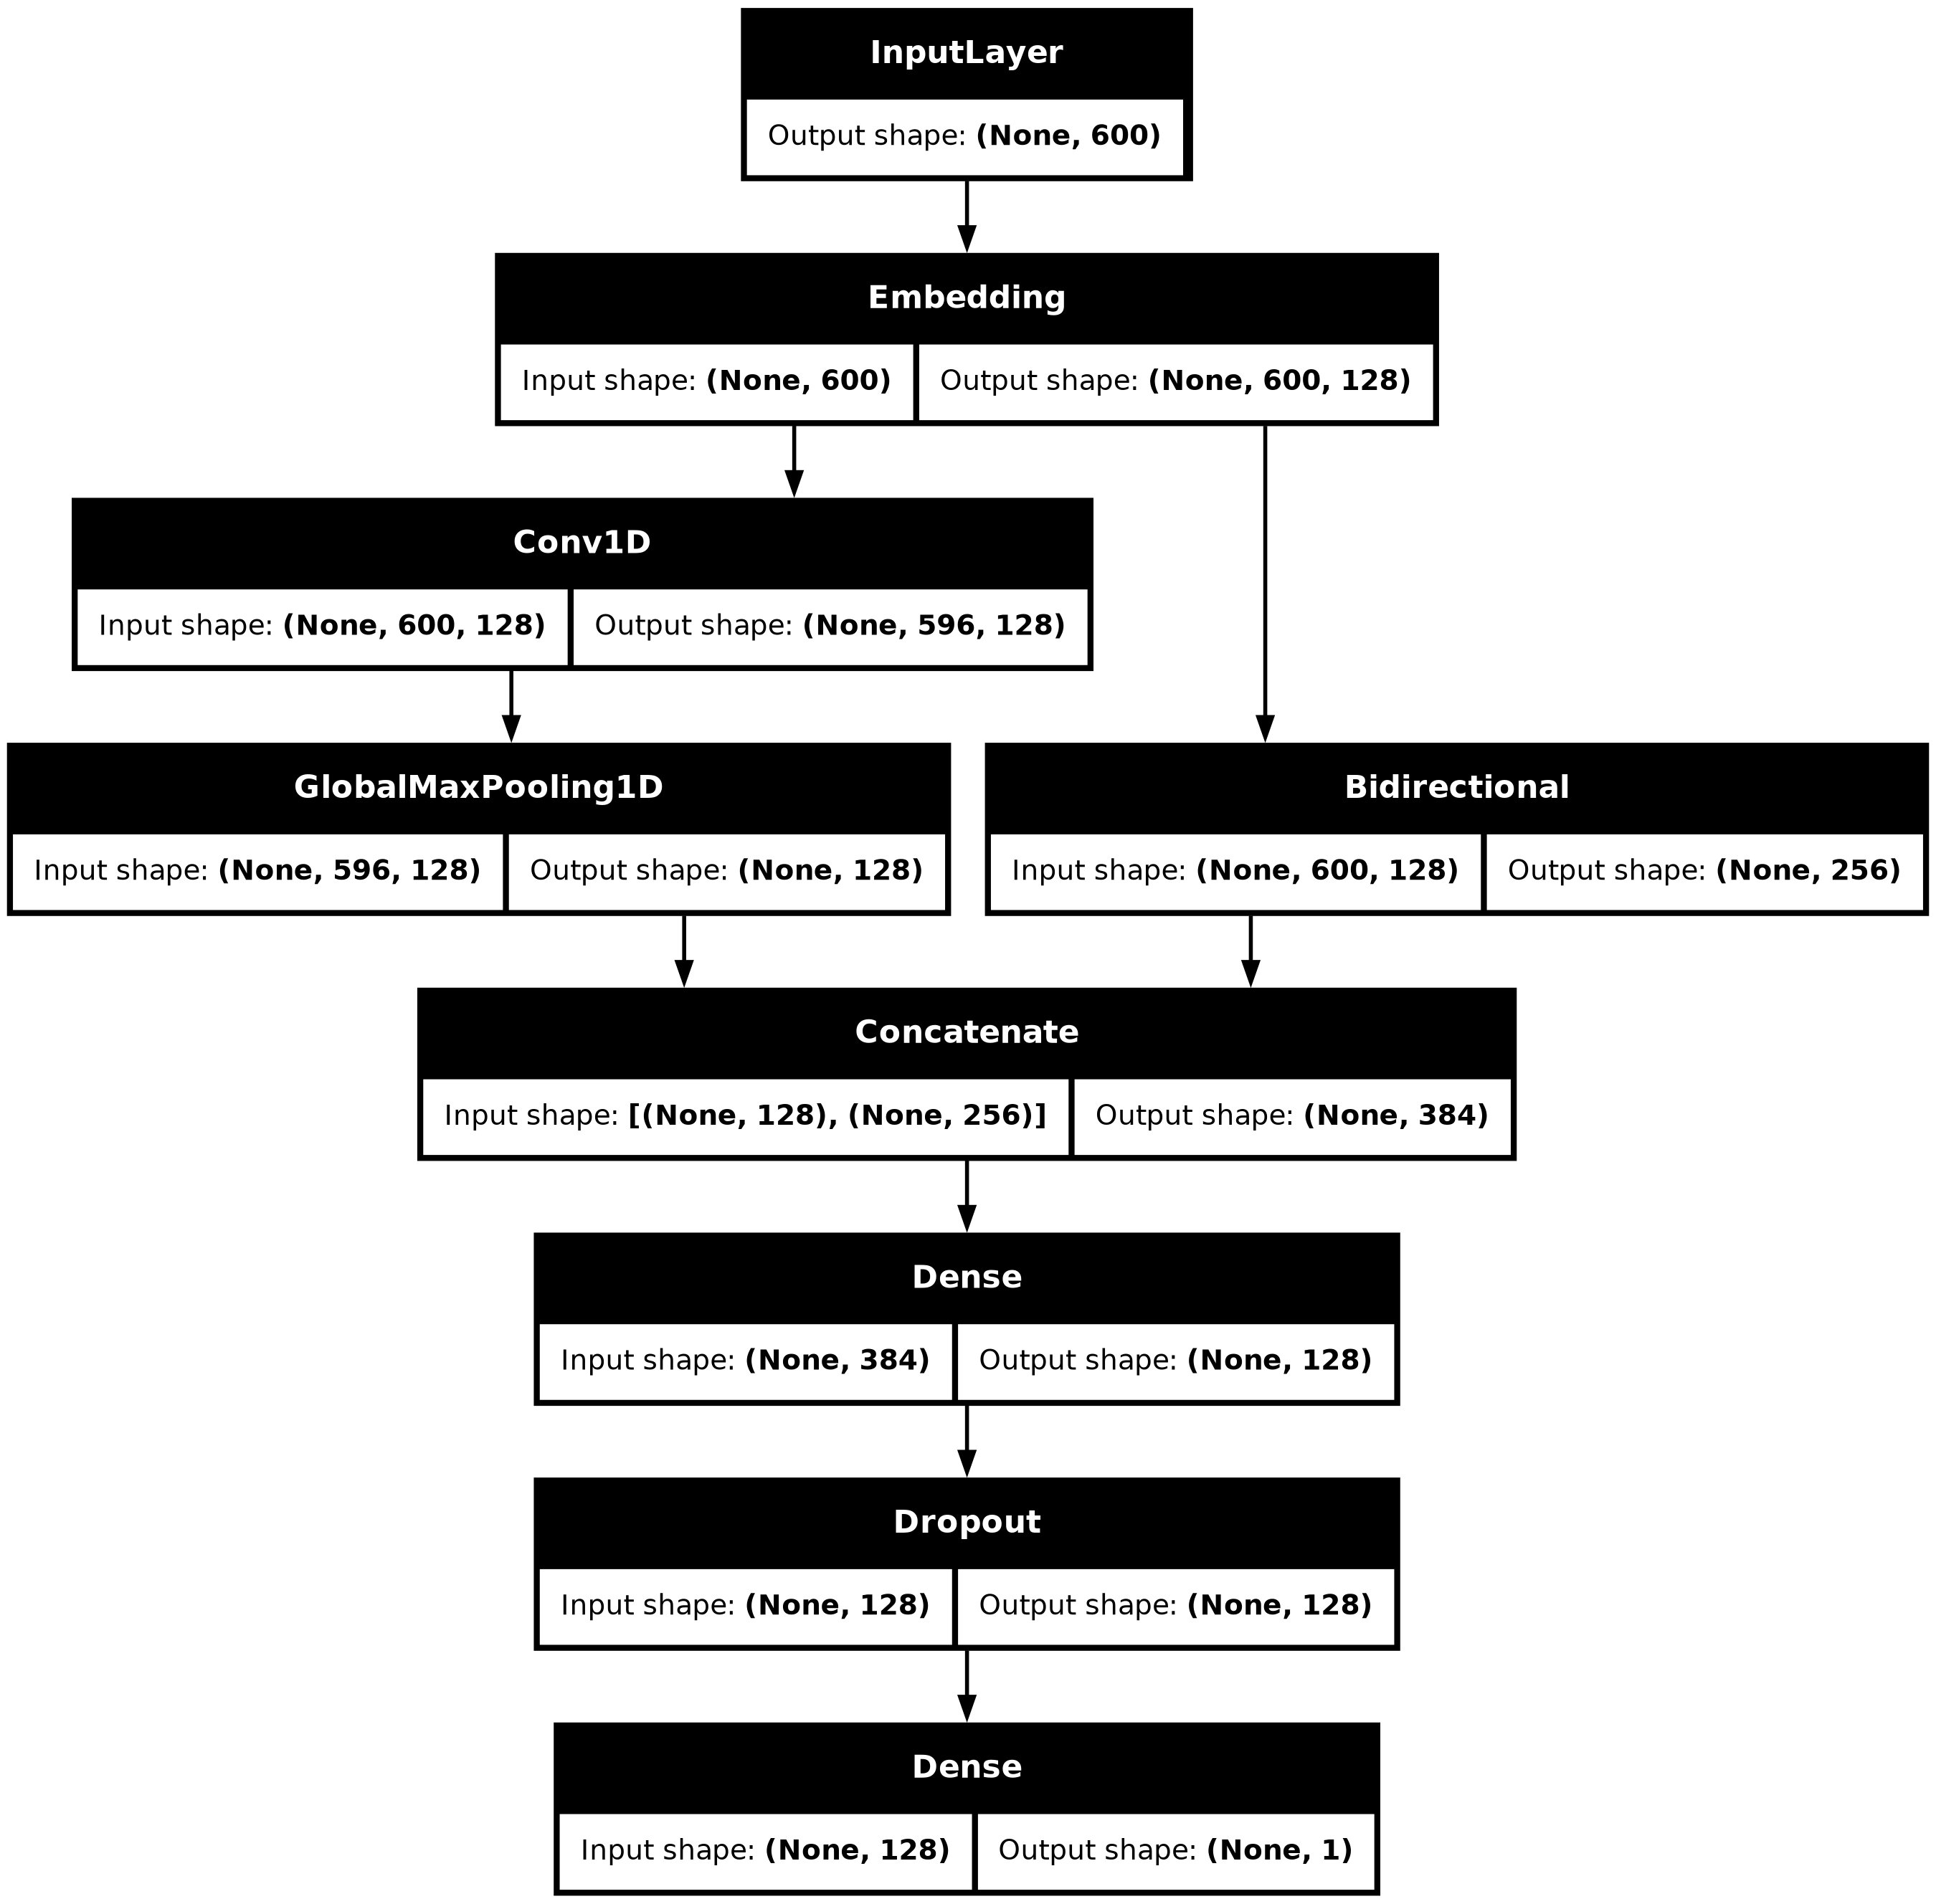

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 173s 85ms/step - accuracy: 0.8573 - loss: 0.3100 - val_accuracy: 0.9429 - val_loss: 0.1648
Epoch 2/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9644 - loss: 0.1012 - val_accuracy: 0.9466 - val_loss: 0.1572
Epoch 3/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9829 - loss: 0.0490 - val_accuracy: 0.9480 - val_loss: 0.1862
Epoch 4/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9889 - loss: 0.0307 - val_accuracy: 0.9476 - val_loss: 0.2088
Epoch 5/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9927 - loss: 0.0215 - val_accuracy: 0.9496 - val_loss: 0.2802
Epoch 6/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9938 - loss: 0.0171 - val_accuracy: 0.9473 - val_loss: 0.3084
Epoch 7/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.9947 - loss: 0.0144 - val_accuracy: 0.9484 - val_loss: 0.3213
Epoch 8/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 

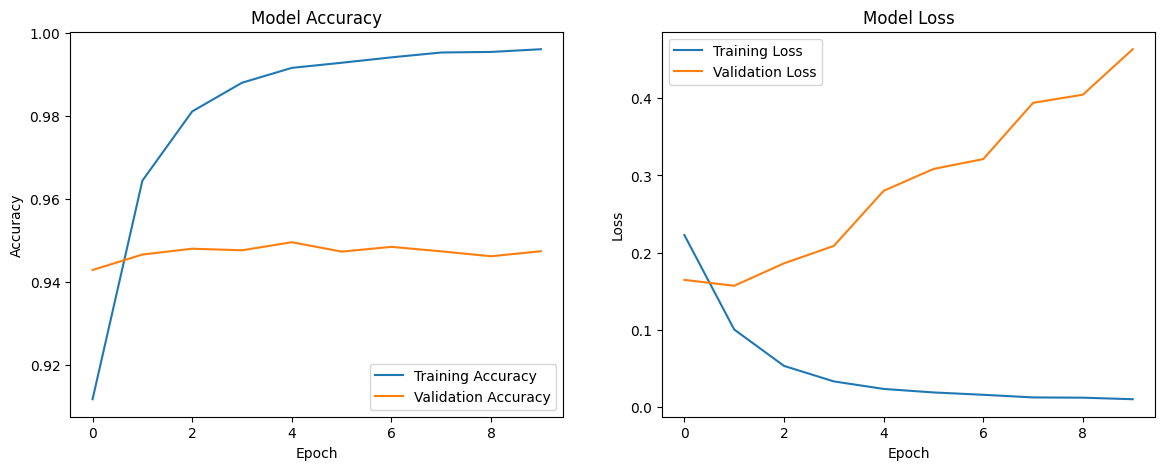

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

980/980 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9477 - loss: 0.4736
Test Accuracy: 94.74%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

# Extract features from the CNN-BiLSTM model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
X_train_features = feature_extractor.predict(X_train_pad)
X_test_features = feature_extractor.predict(X_test_pad)

# Train a Logistic Regression model with increased iterations
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_features, y_train)

# Predict and evaluate the Logistic Regression model
y_pred = lr_model.predict(X_test_features)
target_names = [str(cls) for cls in label_encoder.classes_]

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

3918/3918 ━━━━━━━━━━━━━━━━━━━━ 112s 29ms/step
980/980 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step
              precision    recall  f1-score   support

    negative       0.95      0.93      0.94     14237
    positive       0.95      0.96      0.95     17105

    accuracy                           0.95     31342
   macro avg       0.95      0.95      0.95     31342
weighted avg       0.95      0.95      0.95     31342



# LIME

In [ ]:
pip install lime

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
# Define a prediction function that LIME can use
def predict_fn(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    features = feature_extractor.predict(padded_sequences)
    return lr_model.predict_proba(features)


In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[0]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


In [ ]:
exp.save_to_file('lime_explanation1.html')

In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[5]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


In [ ]:
exp.save_to_file('lime_explanation2.html')

In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[50]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


In [ ]:
exp.save_to_file('lime_explanation3.html')

In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[100]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


In [ ]:
exp.save_to_file('lime_explanation6.html')

In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[168]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


In [ ]:
exp.save_to_file('lime_explanation7.html')

In [ ]:
explainer = LimeTextExplainer(class_names=target_names)
text_to_explain = X_test.iloc[24]
exp = explainer.explain_instance(text_to_explain, predict_fn, num_features=10)
exp.show_in_notebook(text=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


In [ ]:
exp.save_to_file('lime_explanation7.html')

# SHAP

In [ ]:
pip install shap

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.
